# Text classification with Naive Bayes classifier

- In this colab, we will use Naive Bayes classifier for classifying text.

- Naive Bayes classifier is used for text classification and spam detection tasks.

- Here is an example as how to perform the text classification with Naive Bayes classifier.

In [1]:
# Data loading
from sklearn.datasets import fetch_20newsgroups

# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

# Model/estimator
from sklearn.naive_bayes import MultinomialNB

# Pipeline utility
from sklearn.pipeline import make_pipeline

# Model evaluation
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting library
import matplotlib.pyplot as plt

# Dataset

- We will be using 20 `newsgroup` data set for classification.

- As a first step, let's download 20 newsgroup dataset with `fetch_20newsgroups` API.

In [2]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

There are 20 categories in the dataset. For simplicity, we will select 4 of these categories and download training and test sets.

In [3]:
categories = ['talk.religion.misc', 'soc.religion.christian',
'sci.space', 'comp.graphics']
train = fetch_20newsgroups (subset='train', categories=categories)
test = fetch_20newsgroups (subset='test', categories=categories)

In [4]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



# Data preprocessing and modeling

- As we have mentioned this in the first week of machine learning techniques
  course, we need to convert the text data to numeric form. `TfidfVectorizer` is
  one such API that converts text input into a vector of numerical values.

- We will use `TfidfVectorizer` as a preprocessing step to obtain feature vector corresponding to the text document.

- We will be using multinomial naive Bayes classifier for categorizing documents from 20newsgroup corpus.

In [5]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [6]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

### Model evaluation
- Let's first predict the labels for the test set and then calculate the confusion matrix for the test set.

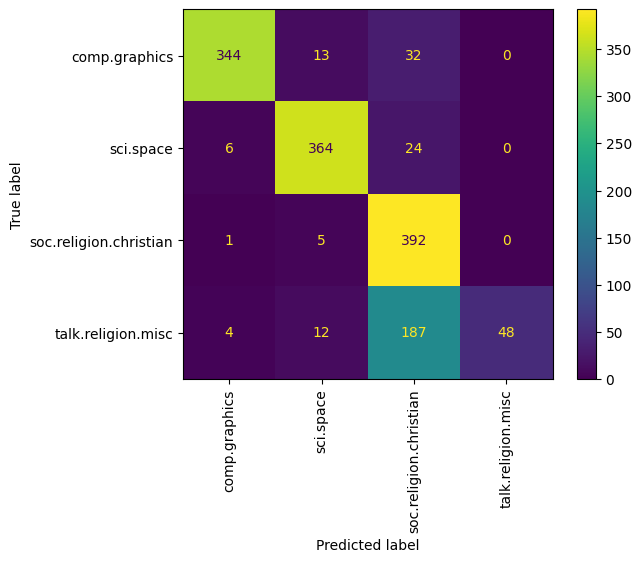

In [7]:
ConfusionMatrixDisplay.from_estimator(
    model,
    test.data,
    test.target,
    display_labels=test.target_names,
    xticks_rotation="vertical",
)
plt.show()

Observe that:

- There is a confusion between documents of class soc.religion.christian and
  talk.religion.misc, which is along the expected lines.

- The classes comp.graphics and sci.space are well separated by such a simple classifier.

- Now we have a tool to classify statements into one of these four classes.

- Make use of predict function on pipeline for predicting category of a test string.

In [8]:
def predict_category(s, train=train, model=model):
    pred = model.predict ([s])
    return train. target_names [pred [0] ]

In [9]:
predict_category ('sending a payload to the ISS')

'sci.space'

In [10]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'